<a href="https://colab.research.google.com/github/OGustavo-Silva/footbalCsvAnalysis_uni9/blob/main/FootballTeamsDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projeto - Uninove | Ciência de dados Prof. Jose Storopli

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Football teams.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          98 non-null     object 
 1   Tournament    98 non-null     object 
 2   Goals         98 non-null     int64  
 3   Shots pg      98 non-null     float64
 4   yellow_cards  98 non-null     int64  
 5   red_cards     98 non-null     int64  
 6   Possession%   98 non-null     float64
 7   Pass%         98 non-null     float64
 8   AerialsWon    98 non-null     float64
 9   Rating        98 non-null     float64
dtypes: float64(5), int64(3), object(2)
memory usage: 7.8+ KB


In [35]:
df.head()

,Team,Tournament,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating
0,Manchester City,Premier League,83,15.8,46,2,60.8,89.4,12.8,7.01
1,Bayern Munich,Bundesliga,99,17.1,44,3,58.1,85.5,12.9,6.95
2,Paris Saint-Germain,Ligue 1,86,15.0,73,7,60.1,89.5,9.5,6.88
3,Barcelona,LaLiga,85,15.3,68,2,62.4,89.7,10.6,6.87
4,Real Madrid,LaLiga,67,14.4,57,2,57.7,87.7,11.8,6.86


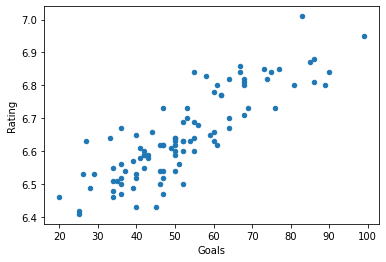

In [36]:
df.plot(x='Goals', y='Rating', kind='scatter')

plt.show()

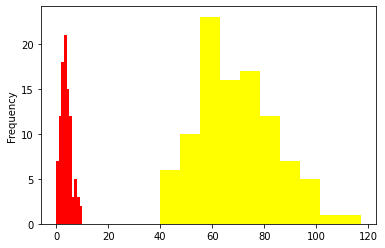

In [37]:
df['yellow_cards'].plot(kind='hist', color='yellow')
df['red_cards'].plot(kind='hist', color='red')
plt.show()

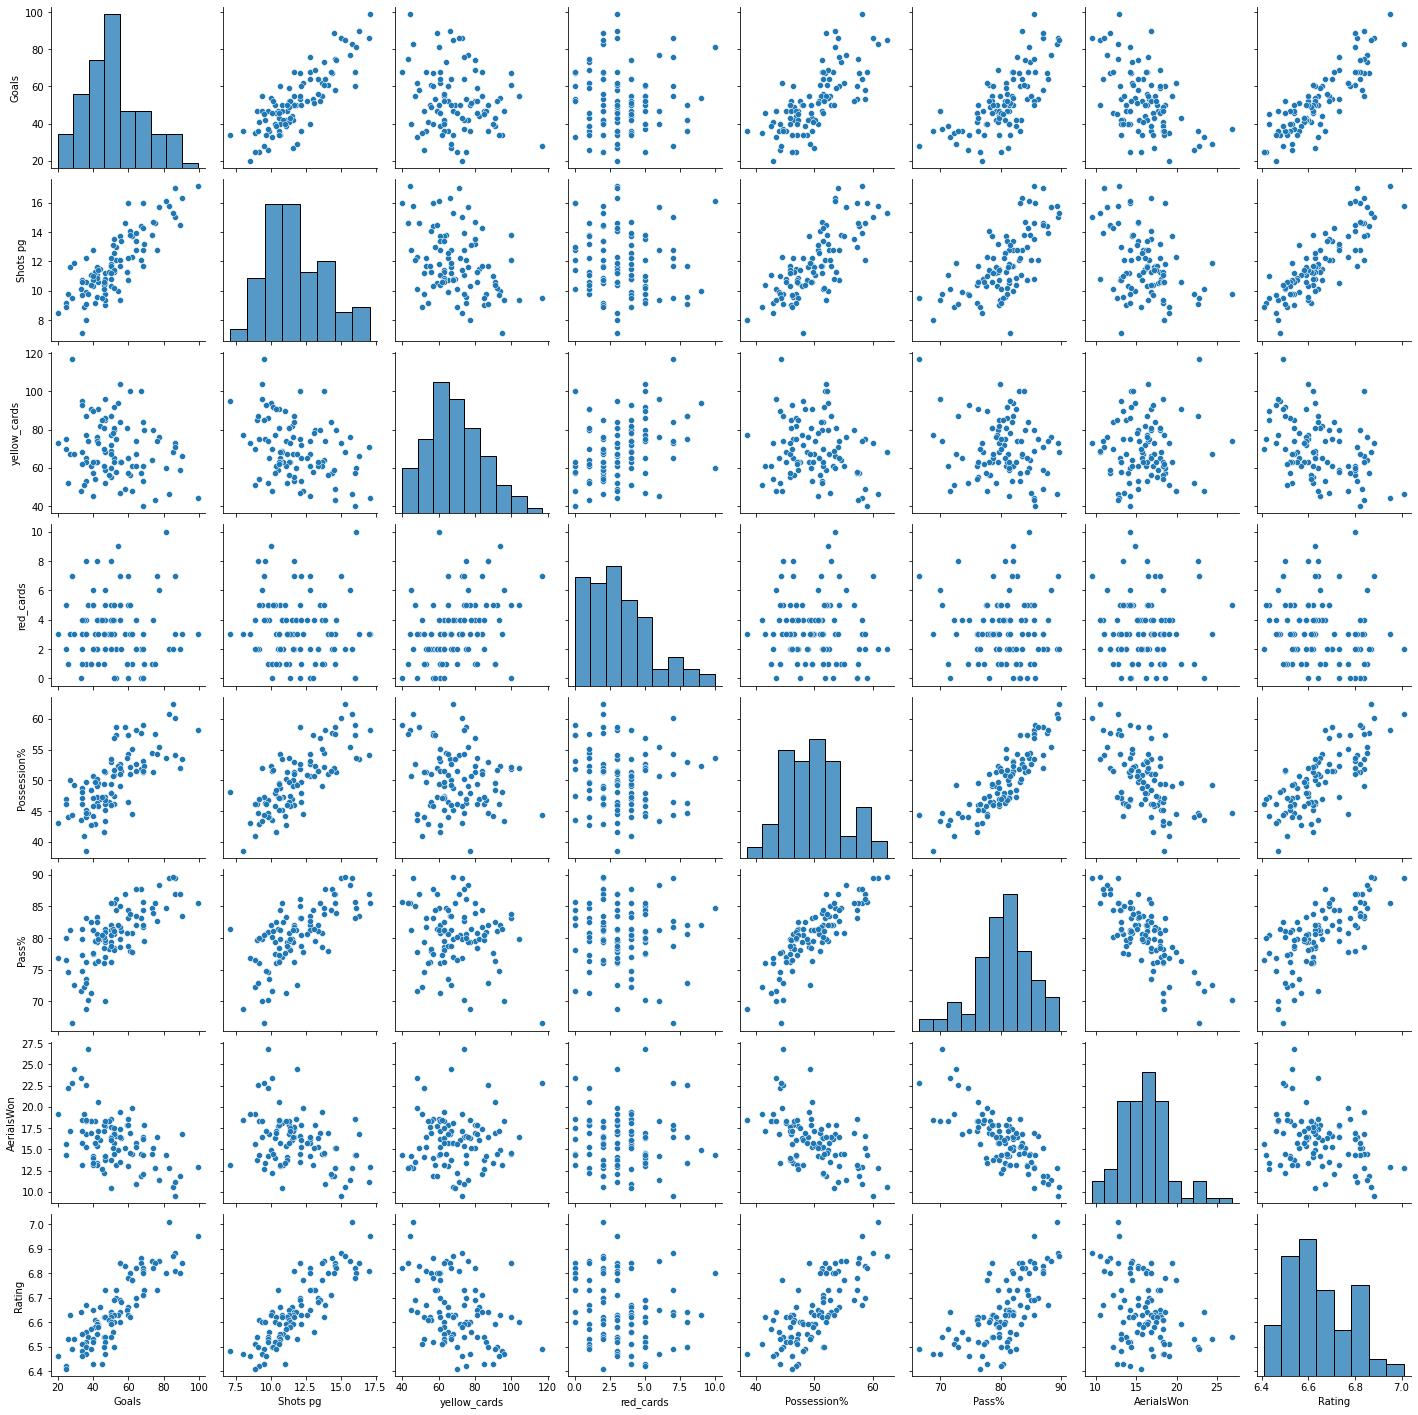

In [38]:
sns.pairplot(df)

In [39]:
df.isna().sum()

Team            0
Tournament      0
Goals           0
Shots pg        0
yellow_cards    0
red_cards       0
Possession%     0
Pass%           0
AerialsWon      0
Rating          0
dtype: int64

In [40]:
x = df.drop(['Team', 'Tournament' ,'Rating'], axis=1)
y = df["Rating"]


In [41]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

##Predição da avaliação
Separando em data set de treino e teste

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [43]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [44]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

In [45]:
from sklearn import metrics
print("Acuracia dos dados de treino:", metrics.r2_score(y_train, y_pred_train)*100)
test_accu = metrics.r2_score(y_test, y_pred_test)*100
print("Acuracia dos dados de teste:", test_accu)

Acuracia dos dados de treino: 85.93715635518097
Acuracia dos dados de teste: 85.50910152456676


In [46]:
print('Erro médio absoluto:', metrics.mean_absolute_error(y_test, y_pred_test))
print('Erro médio quadrático:', metrics.mean_squared_error(y_test, y_pred_test))
print('Raiz de erro médio quadrático:', metrics.mean_squared_error(y_test, y_pred_test)**(1/2))

Erro médio absoluto: 0.04347097831344238
Erro médio quadrático: 0.0025545642649879422
Raiz de erro médio quadrático: 0.05054269744471443


In [47]:
new_pred = pd.DataFrame([[77, 15.5 ,55, 1, 53, 88, 12.8]])
print(lr.predict(new_pred))

[6.86420293]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


##Predição de gols por avaliação, posse, chutes e porcentagem de passe

In [48]:
z = df.drop(['Team', 'Tournament' ,'Goals', 'yellow_cards', 'red_cards', 'AerialsWon'], axis=1)
j = df["Goals"]

In [52]:
from sklearn.neighbors import KNeighborsRegressor

z_train, z_test, j_train, j_test = train_test_split(z, j, test_size=0.2, random_state=10)

knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(z_train, j_train)

KNeighborsRegressor(n_neighbors=2)

In [53]:
j_pred_train = knn.predict(z_train)
j_pred_test = knn.predict(z_test)

Acuracia

In [54]:
print("Acuracia dos dados de treino:", metrics.r2_score(j_train, j_pred_train)*100)
ac2 = metrics.r2_score(j_test, j_pred_test)*100
print("Acuracia dos dados de teste:", ac2)

Acuracia dos dados de treino: 84.35000767413433
Acuracia dos dados de teste: 63.765747563584505


In [56]:
print('Erro médio absoluto:', metrics.mean_absolute_error(j_test, j_pred_test))
print('Erro médio quadratico:', metrics.mean_squared_error(j_test, j_pred_test))
print('Raiz do erro médio quadratico:', metrics.mean_squared_error(j_test, j_pred_test)**(1/2))


Erro médio absoluto: 8.7
Erro médio quadratico: 121.95
Raiz do erro médio quadratico: 11.043097391583578
